In [126]:
require(graphics); require(grDevices); require("heatmap.plus");library(gplots)


Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [20]:
odds <- read.csv(file = '/home/hermuba/data0118/ontologies/genotype_fisher_odds_corrected.csv', header = TRUE, sep = ',')


rownames(odds) <- odds[, 1] ## set rownames
odds <- odds[, -1]  

odds <- as.data.frame(odds)
odds[is.na(odds)] <- 1

odds[odds == 0] <- 0.0001

log_odds <- log(odds)

In [16]:
rownames(odds) <- odds[, 1] ## set rownames
odds <- odds[, -1]  

In [51]:
annotation <- read.csv(file = '/home/hermuba/data0118/all_abx_anno.csv', header = TRUE, sep = ',')
rownames(annotation) <- annotation[, 1] ## set rownames
annotation <- annotation[, -1]  


In [151]:
annotation[, 1:4]


,efflux.pump,antibiotic,resfam_mechanism,resfam_abs
562.10576.con.0008_20|562.10576,,,,
562.10576.con.0029_46|562.10576,False,,,
562.10576.con.0045_7|562.10576,False,aminoglycoside,Phosphotransferase,Aminoglycoside Modifying Enzyme
562.10576.con.0045_9|562.10576,False,aminoglycoside,Acetyltransferase,Aminoglycoside Modifying Enzyme
562.10576.con.0047_4|562.10576,True,,MFS Transporter,Tetracycline MFS Efflux
562.22429.con.0059_8|562.22429,True,,MFS Transporter,MFS Transporter
562.22437.con.0041_3|562.22437,False,,,
562.22437.con.0041_7|562.22437,True,,Other Efflux,Other Efflux
562.22437.con.0041_9|562.22437,False,,,
562.22453.con.0089_10|562.22453,,,,


In [29]:
library(RColorBrewer)

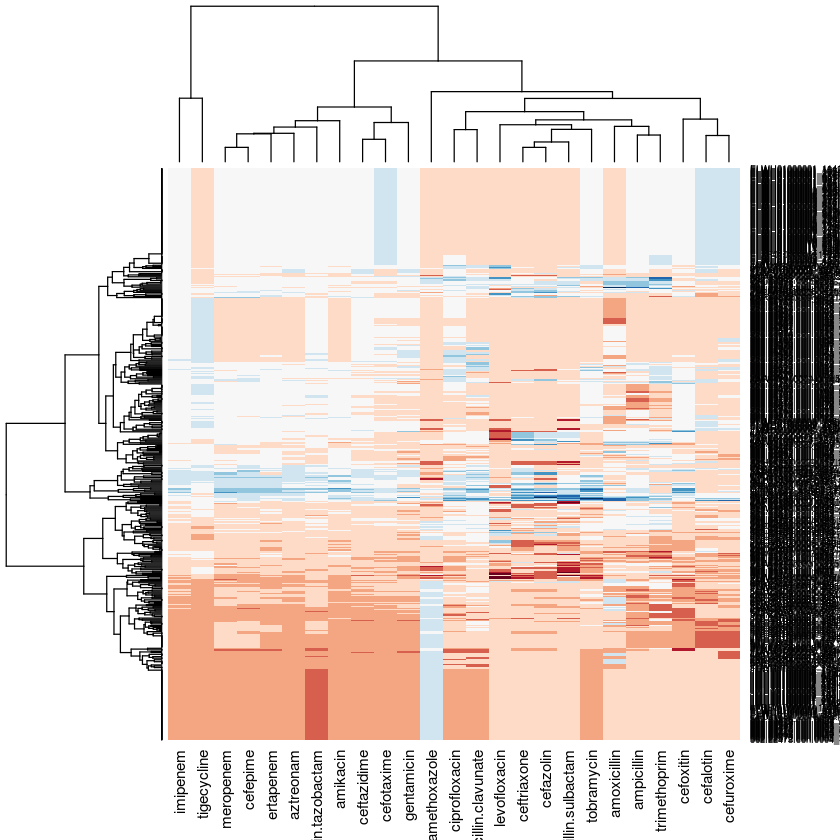

In [122]:
heatmap.plus(as.matrix(log_odds), scale = "col",col=brewer.pal(11,"RdBu"))

In [141]:
library(pheatmap)

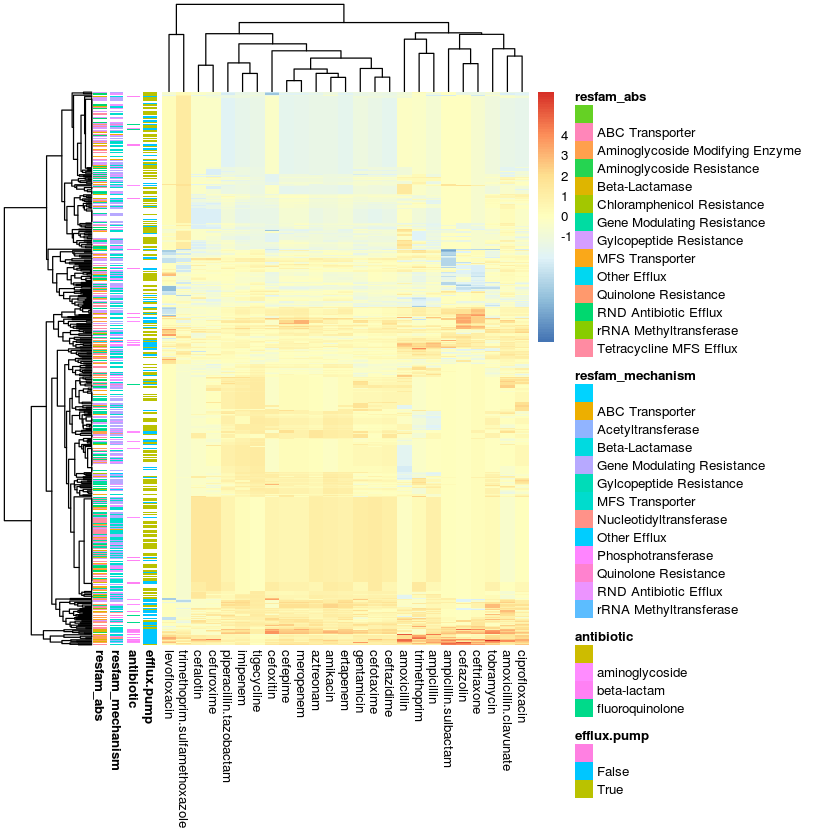

In [163]:
out <- pheatmap(as.matrix(log_odds), 
      show_rownames=F, cluster_cols=T, cluster_rows=T, scale="column",
      cex=1, clustering_distance_rows="euclidean", cex=1,
      clustering_distance_cols="euclidean", clustering_method="complete", border_color=FALSE,
      annotation_row=annotation[, 1:4], width = 15, height = 20, legend_breaks = -1:4, fontsize = 8)

pdf 
  6

png 
  2

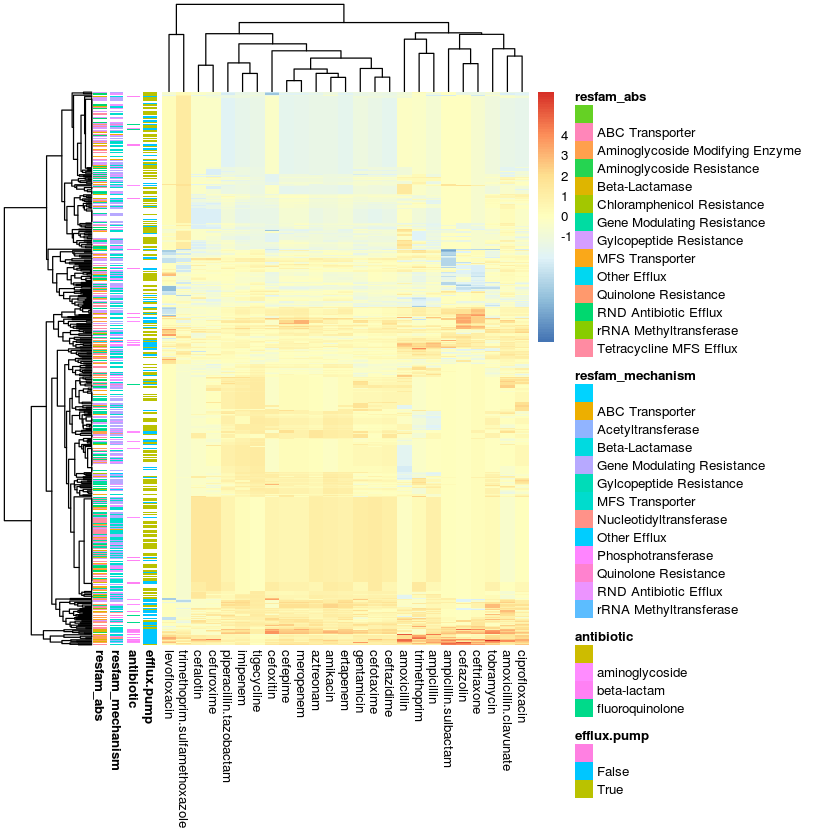

In [164]:
print(out)
dev.copy(pdf, '/home/hermuba/data0118/fig/fig_7_combined.pdf')
dev.off()